In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [28]:
filterwarnings("ignore")

In [29]:
df = pd.read_csv("shopping_trends.csv")
df.sample(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
141,142,56,Male,Gloves,Accessories,46,Virginia,M,Turquoise,Fall,4.9,Yes,PayPal,Free Shipping,Yes,Yes,45,PayPal,Weekly
2790,2791,34,Female,Socks,Clothing,63,Maine,M,Black,Spring,4.5,No,Cash,Free Shipping,No,No,24,Debit Card,Annually
1910,1911,29,Male,Sandals,Footwear,38,New York,S,Yellow,Fall,3.8,No,Venmo,Express,No,No,13,Debit Card,Quarterly


In [30]:
print(df.columns.to_list(),end='\n\n')

['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']



In [31]:
print(f"Shape:{df.shape}")

Shape:(3900, 19)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [33]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [34]:
df.isna().sum().sum()

0

In [35]:
df.Gender.value_counts().index.to_list()

['Male', 'Female']

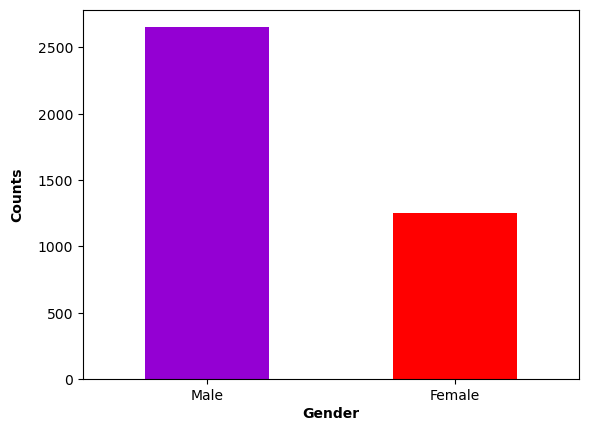

In [36]:
plt.figure
ax = df.Gender.value_counts().plot(kind='bar',rot=0,color=['darkviolet','red'])
plt.xlabel("Gender",weight='bold',labelpad=3)
plt.ylabel("Counts",weight='bold',labelpad=10)
plt.show()

In [16]:
def fun(pct,all_values):
    absolute = pct / 100 * np.sum(all_values)
    return "{:.2f}%\n{:.2f}".format(pct,absolute)

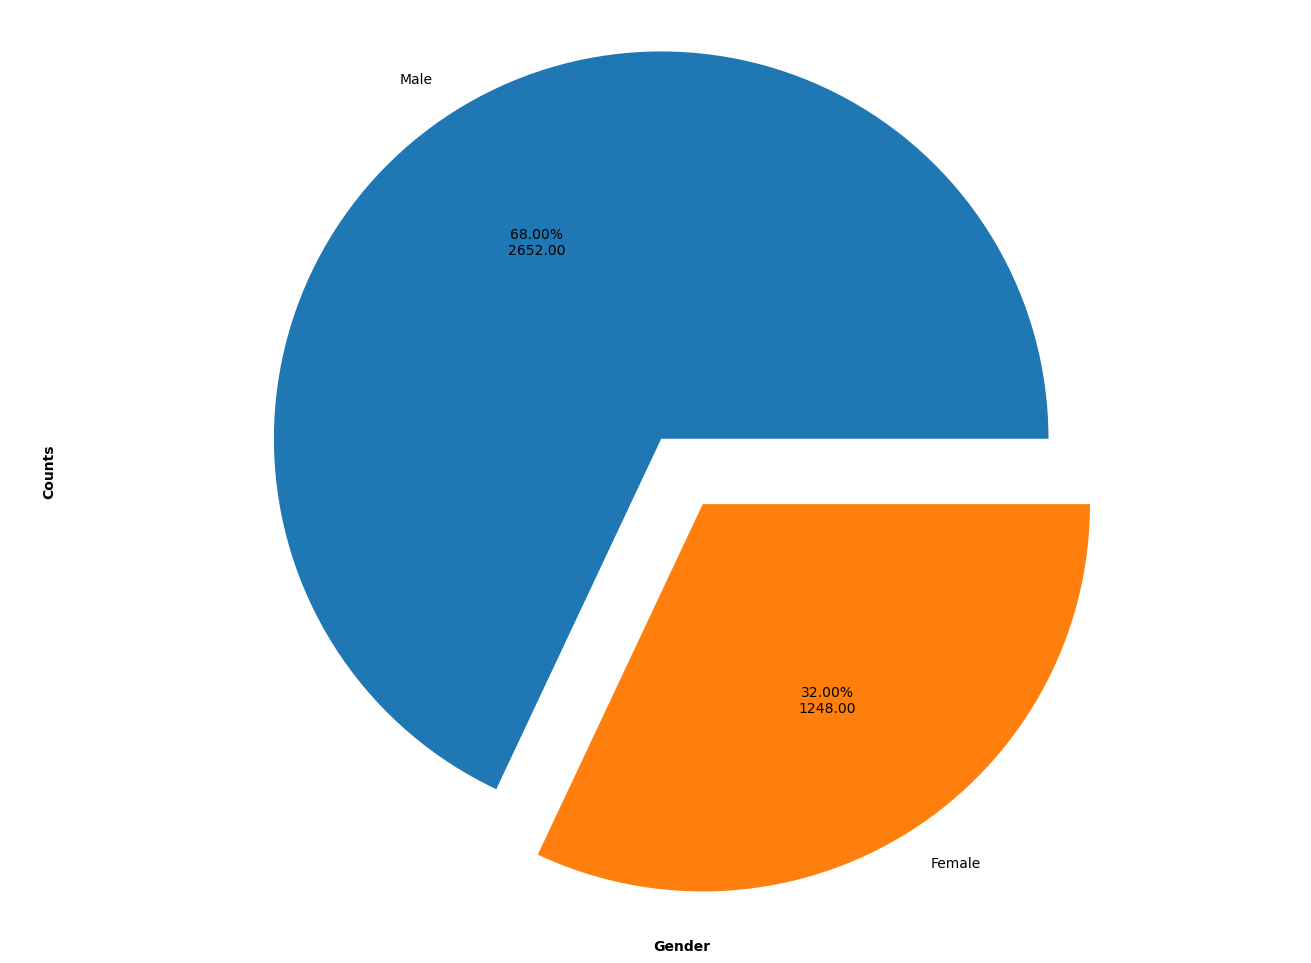

In [37]:
plt.figure(figsize=(16,12))
plt.pie(df.Gender.value_counts().values,labels=df.Gender.unique(),autopct= lambda pct: fun(pct,df.Gender.value_counts().values),explode=[0,0.2])
plt.xlabel("Gender",weight='bold')
plt.ylabel("\n\nCounts",weight='bold')
plt.axis('equal')
plt.show()

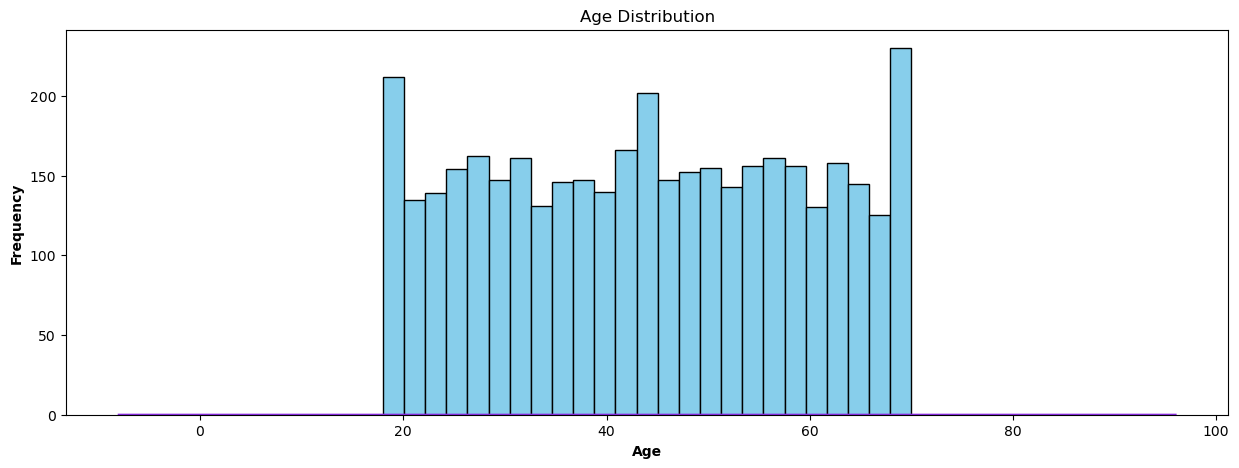

In [38]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(df.Age,bins=25,color='skyblue',density=False,edgecolor='black')
df.Age.plot(kind='kde',color='blueviolet',ax=ax)
plt.title("Age Distribution")
plt.xlabel("Age",weight='bold')
plt.ylabel("Frequency",weight='bold')
plt.show()

In [39]:
df.Category.value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

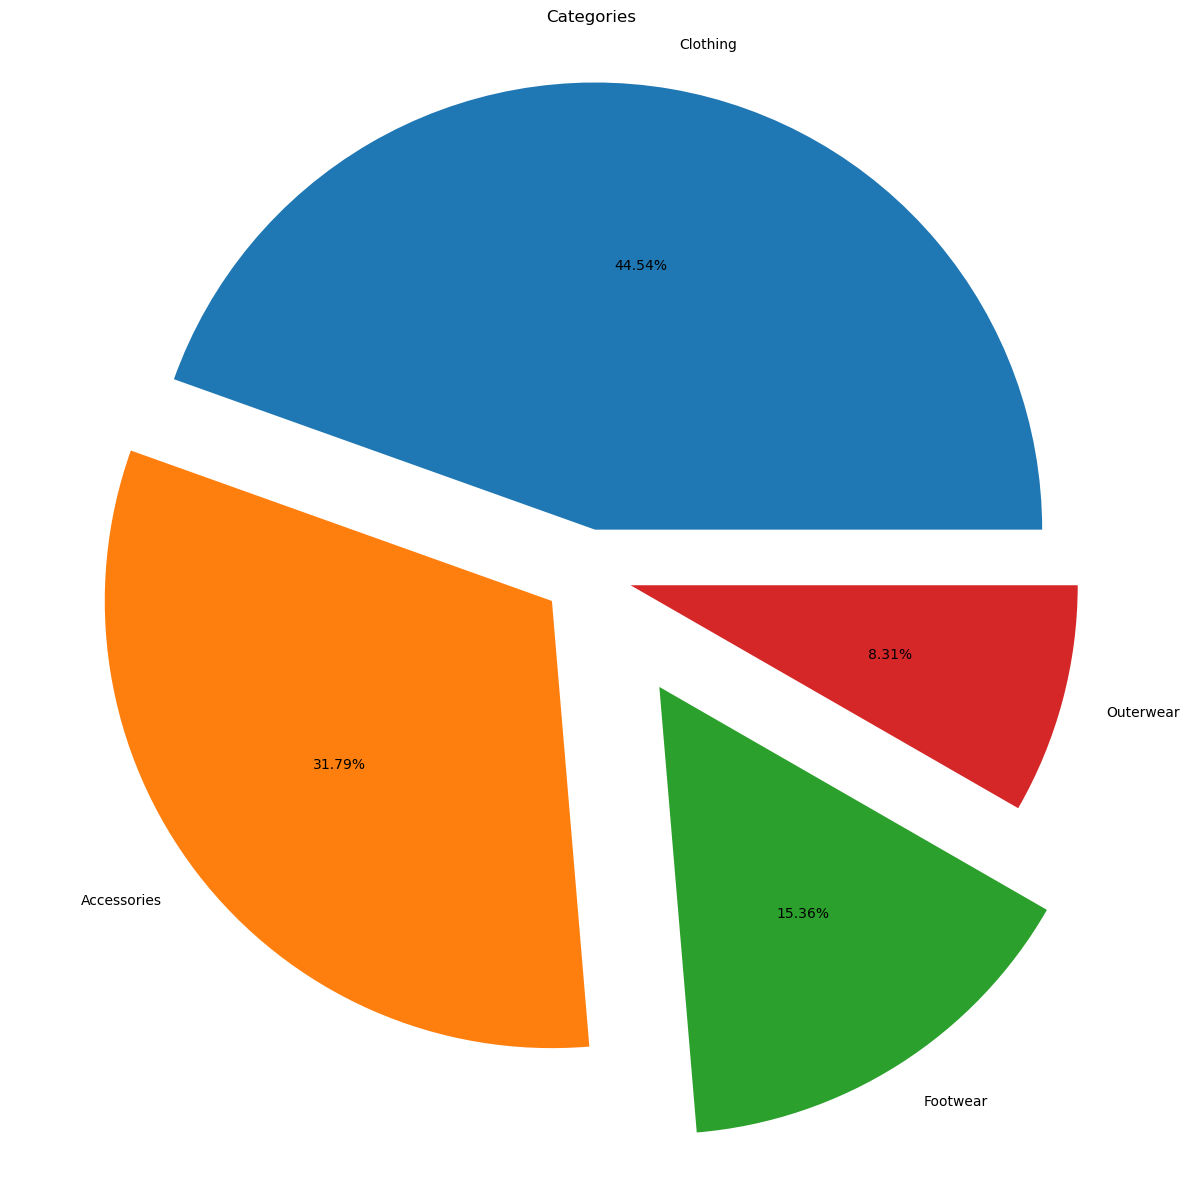

In [20]:
plt.figure(figsize=(15,15))
categories = trends.Category.value_counts()
plt.pie(categories.values,labels=categories.index,explode=[0.1,0.1,0.3,0.1],autopct="%.2f%%")
plt.title("Categories")
plt.axis("equal")
plt.show()

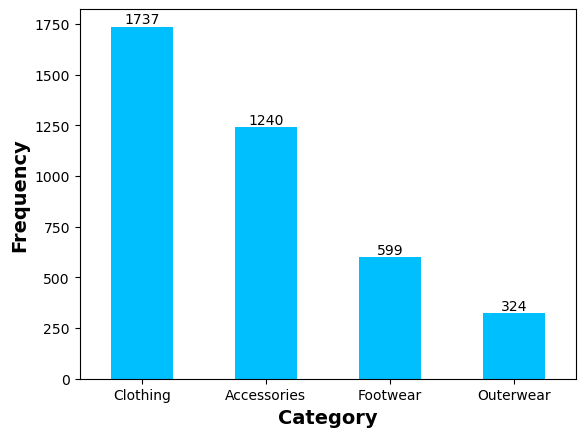

In [40]:
ax = categories.plot(kind='bar',rot=0,color="deepskyblue")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + 0.25,p.get_height()+1),ha='center',va='bottom')
plt.xlabel("Category",weight='bold',fontsize=14)
plt.ylabel("Frequency",weight='bold',fontsize=14)
plt.show()

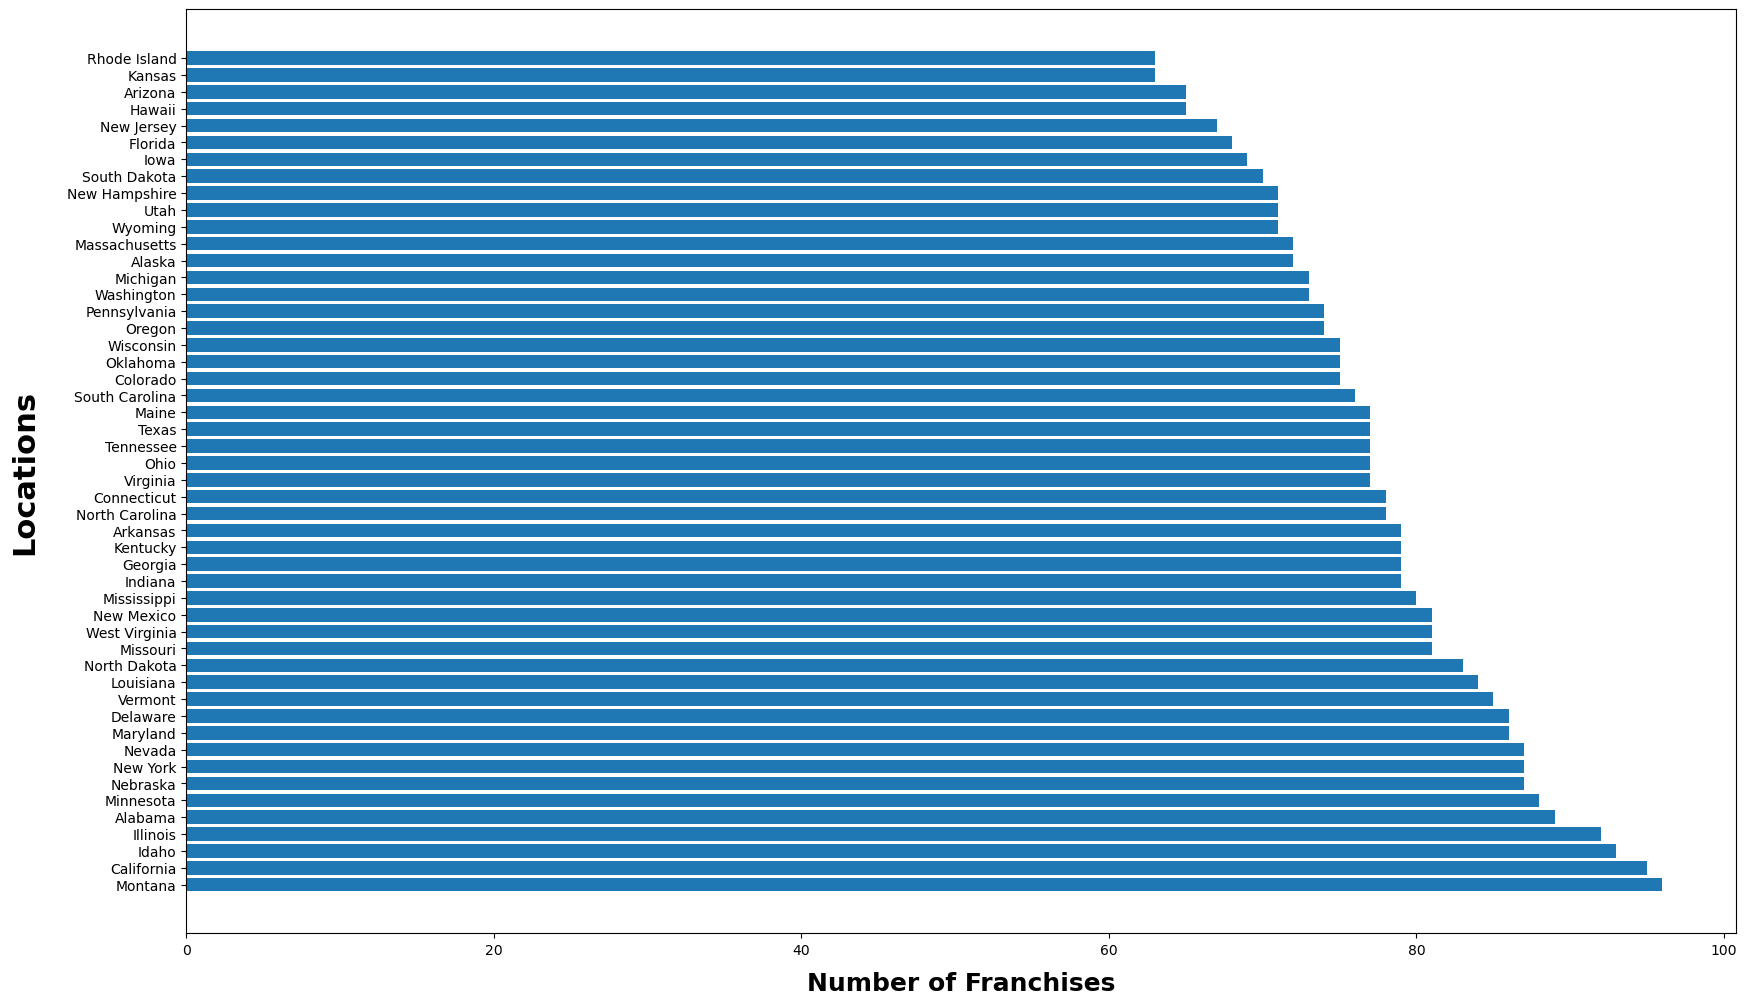

In [41]:
plt.figure(figsize=(20,12))
plt.barh(df.Location.value_counts().index,df.Location.value_counts().values)
plt.xlabel("Number of Franchises",weight='bold',labelpad=10,fontsize=18)
plt.ylabel("Locations",weight='bold',labelpad=20,fontsize=22)
plt.show()

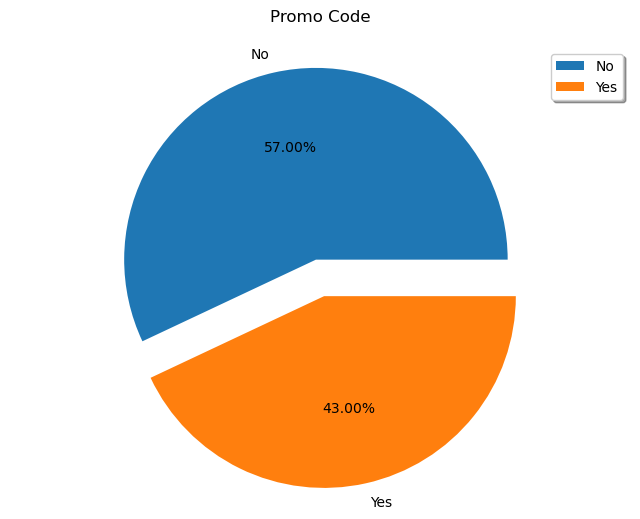

In [42]:
plt.figure(figsize=(8,6))
plt.pie(df["Promo Code Used"].value_counts().values,labels=df["Promo Code Used"].value_counts().index,explode=[0,0.2],autopct='%0.2f%%',radius=1.025)
plt.title("Promo Code\n")
plt.legend(shadow=True,loc='best')
plt.axis('equal')
plt.show()

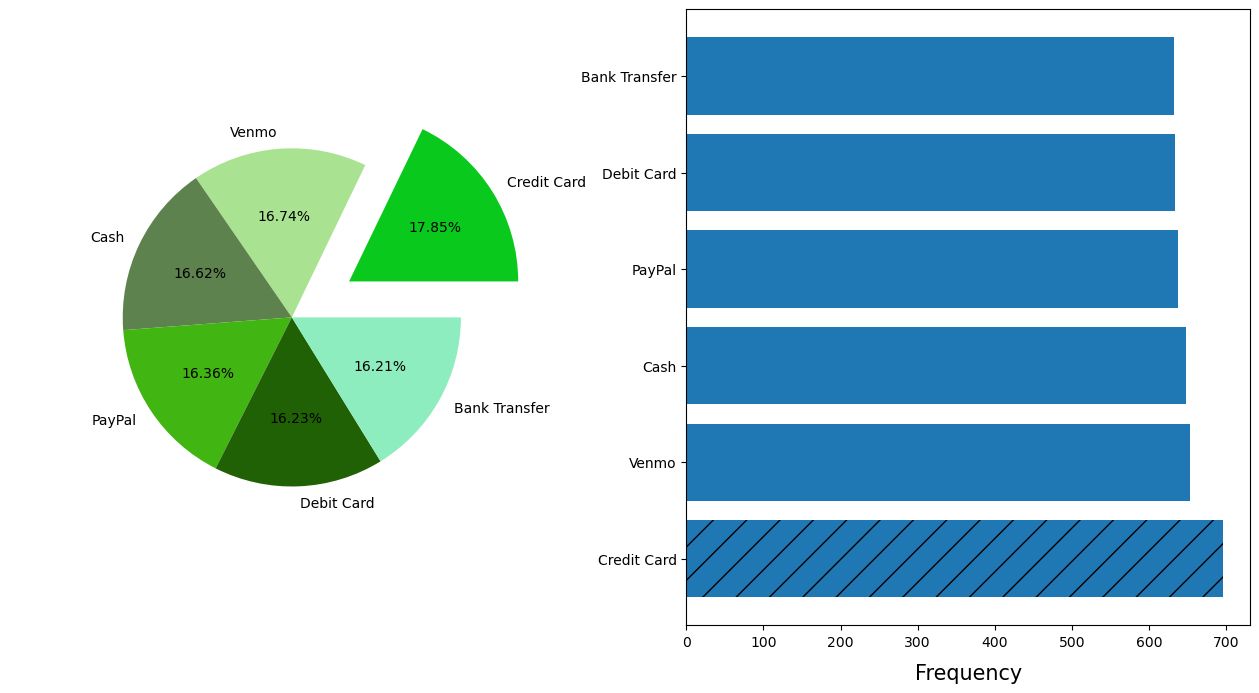

In [43]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(df["Payment Method"].value_counts().values,labels=df["Payment Method"].value_counts().index,colors=["#0ac91d",'#a9e391','#5d824e','#41b512','#206106','#8eedbe'],autopct="%0.2f%%",explode=[0.3,0,0,0,0,0],radius=0.75)
plt.subplot(1,2,2)
plt.barh(df["Payment Method"].value_counts().index,df["Payment Method"].value_counts().values)[0].set_hatch('/')
plt.xlabel("Frequency",labelpad=10,fontsize=15)
plt.show()

In [44]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

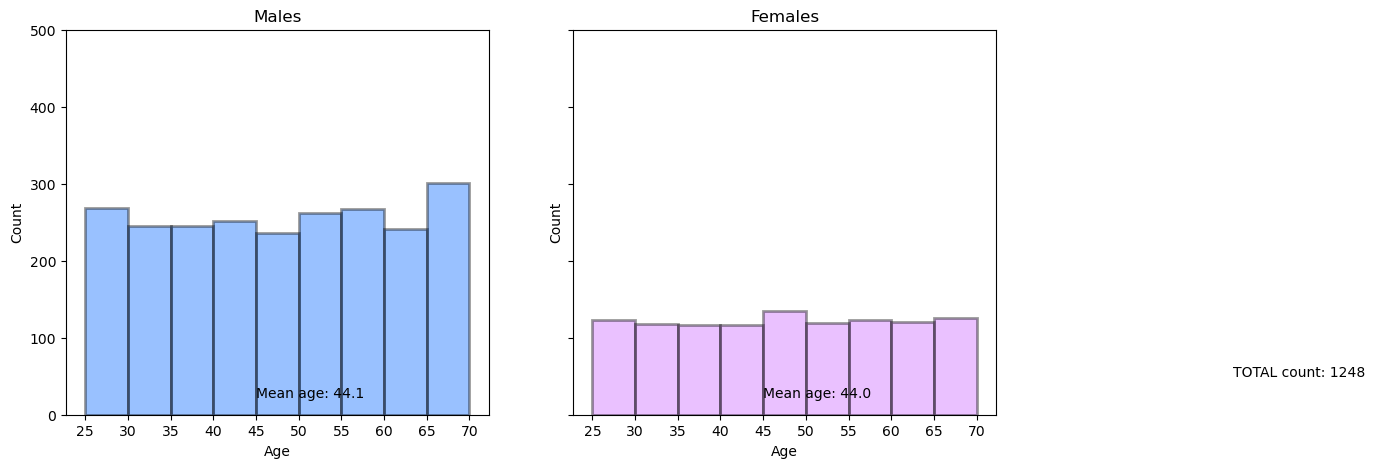

In [55]:
males_age = df[df['Gender']=='Male']['Age'] # subset with males age
females_age = df[df['Gender']=='Female']['Age'] # subset with females age

age_bins = range(25,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=500)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(100,50, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,23, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(100,50, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [63]:
from sklearn.cluster import KMeans 